# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings(action='ignore')

# Importing the dataset

In [2]:
dataset='data.csv'
data = pd.read_csv(dataset)
data.drop("Unnamed: 0",axis=1,inplace=True)
print(data.head())


       Date  Hours   WS   WD PM10
0  1/4/2015  01:00  1.3  350    9
1  1/4/2015  02:00  1.3  222    7
2  1/4/2015  03:00  1.6  318    7
3  1/4/2015  04:00  0.7  326    7
4  1/4/2015  05:00  1.9  274    6



# Data Preprocessing 

##### Print the data information and replace the "NoData", "Samp", "OffScan" values ​​with the recognized NaN value for the dataframe

In [3]:
data.info()
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each column:')
new_data=data.replace('NoData', np.NaN)                                         #antikathistw tis NoData values me anagnwrisimo NaN gia to dataframe
new_data=new_data.replace('Samp<', np.NaN)
new_data=new_data.replace('OffScan', np.NaN)
print(new_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7752 non-null   object
 1   Hours   7752 non-null   object
 2   WS      7752 non-null   object
 3   WD      7752 non-null   object
 4   PM10    7752 non-null   object
dtypes: object(5)
memory usage: 302.9+ KB
Are there any duplicated values in our data ? : False

The total number of null values in each column:
Date      0
Hours     0
WS       87
WD       87
PM10     90
dtype: int64


####Conversion of degrees to wind directions

In [4]:
df=new_data #copy to df
df=df.astype({'WD': 'float64'})
df=df.astype({'WS': 'float64'})
df=df.astype({'PM10': 'float64'})

df.loc[(df['WD'] >337.5) | (df['WD']<=22.5),'WD1']= 'N'

df.loc[(df['WD'] >22.5) & (df['WD']<=67.5),'WD2']= 'NE'

df.loc[(df['WD'] >67.5) & (df['WD']<=112.5),'WD3']= 'Ε'

df.loc[(df['WD'] >112.5) & (df['WD']<=157.5),'WD4']= 'SE'

df.loc[(df['WD'] >157.5) & (df['WD']<=202.5),'WD5']= 'S'

df.loc[(df['WD'] >202.5) & (df['WD']<=247.5),'WD6']= 'SW'

df.loc[(df['WD'] >247.5) & (df['WD']<=292.5),'WD7']= 'W'

df.loc[(df['WD'] >292.5) & (df['WD']<=337.5),'WD8']= 'NW'

#kanw x.dropna gia na xefortwthw tis NaN times
df["WindDirection"]=df[['WD1','WD2','WD3','WD4','WD5','WD6','WD7','WD8']].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)

####Change the wrong time and combine the hours with the dates

In [5]:
df=df.replace('24:00', '00:00')                    #diorthwnw tin lanthasmeni wra
df['months']=df['Date'].str.split('/').str[1]
df['days']=df['Date'].str.split('/').str[0]
df['hours']=df['Hours'].str.split(':').str[0]
df['nodays']=df['Date'].str.split('').str[0]

#ftiaxnw to datetime enwnw thn hmeromhnia me tis wres 
full_date=[]
for i in range(df.shape[0]):
       full_date.append(str(df['months'].values[i]+'-'+str(df['days'].values[i])+'-15'+' '+str(df['Hours'].values[i])))#default seira M D Y vazw 15 gt to kanei aytomata 2015          
dates=pd.to_datetime(full_date)
dates=pd.DataFrame(dates,columns=['datetime'])
df=pd.concat([dates,df],axis=1)
print(dates)
exportdf=df[['hours','days','months','WindDirection','WS','PM10']]
print("Final dataframe \n",exportdf)

                datetime
0    2015-04-01 01:00:00
1    2015-04-01 02:00:00
2    2015-04-01 03:00:00
3    2015-04-01 04:00:00
4    2015-04-01 05:00:00
...                  ...
7747 2015-09-02 20:00:00
7748 2015-09-02 21:00:00
7749 2015-09-02 22:00:00
7750 2015-09-02 23:00:00
7751 2015-09-02 00:00:00

[7752 rows x 1 columns]
Final dataframe 
      hours days months WindDirection   WS  PM10
0       01    1      4             N  1.3   9.0
1       02    1      4            SW  1.3   7.0
2       03    1      4            NW  1.6   7.0
3       04    1      4            NW  0.7   7.0
4       05    1      4             W  1.9   6.0
...    ...  ...    ...           ...  ...   ...
7747    20    2      9            SE  1.9  67.0
7748    21    2      9             W  0.7  52.0
7749    22    2      9             Ε  0.7  34.0
7750    23    2      9             W  1.0  34.0
7751    00    2      9             W  1.5  32.0

[7752 rows x 6 columns]


Find the most appearing wind direction value and the max values 

In [6]:
print('\nMost appearing for Wind speed',df.WS.mode())
print('Most appearing for direction ',df.WindDirection.mode())
print('Most appearing for PM10 ', df.PM10.mode())
print('\nMax values','\n WindSpeed:',df.WS.max(), '\n WindDirection:', df.WindDirection.max() )


Most appearing for Wind speed 0    0.7
dtype: float64
Most appearing for direction  0    NW
dtype: object
Most appearing for PM10  0    19.0
dtype: float64

Max values 
 WindSpeed: 14.2 
 WindDirection: Ε


####Plot the data

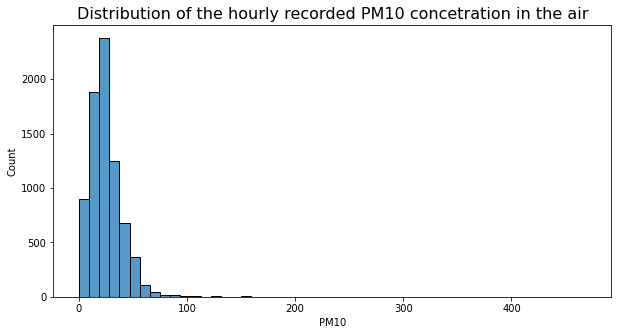

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['PM10'],bins=50)
plt.title('Distribution of the hourly recorded PM10 concetration in the air',fontsize=16)
plt.show()


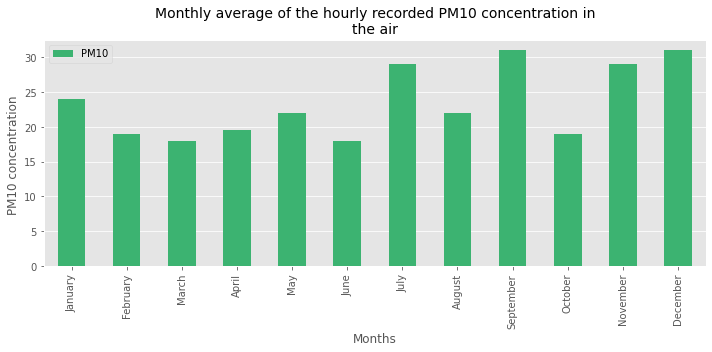

In [8]:
df['months']=df['months'].replace('08',8)
df['months']=df['months'].replace('07',7)
df['months']=df['months'].replace('06',6)
df=df.astype({'months': 'int64'})

monthly_data=df[['months','PM10']]
months2 = ['January','February','March','April','May','June','July',
           'August','September','October','November','December']
monthdf = pd.DataFrame(months2,columns=['months'])
monthFullname={}
for i,j in enumerate(months2):
    monthFullname.setdefault(i+1,j)                                             #i+1 giati thelw na xekinaei apo 1(Ianouarios) kai oxi apo 0

#antistoixisi sto dataframe twn mhnwn -> olografws tous mhnes
monthly_data.months = monthly_data.months.map(monthFullname)
monthly_avg=monthly_data.groupby('months').median()                             #Ton meso oro PM10 ana mina
monthly_avg = pd.merge(monthdf,monthly_avg,left_on='months',right_index=True)
#strogilopoihsh ton meso oro se periptwsh pou xreiastei
monthly_avg = np.round(monthly_avg,1)
monthly_avg=monthly_avg.set_index('months')

with plt.style.context('ggplot'):
    monthly_avg.plot(figsize=(10,5),kind='bar',color='mediumseagreen',linewidth=1)
    plt.xlabel('Months',fontsize=12)
    plt.ylabel('PM10 concentration ',fontsize=12)
    plt.title('Monthly average of the hourly recorded PM10 concentration in\nthe air',fontsize=14)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


In [9]:
#diorthwnw to format ths wras apo 01 02 se 1,2 klp.
df['hours']=df['hours'].replace({'00':0, '01':1}) 

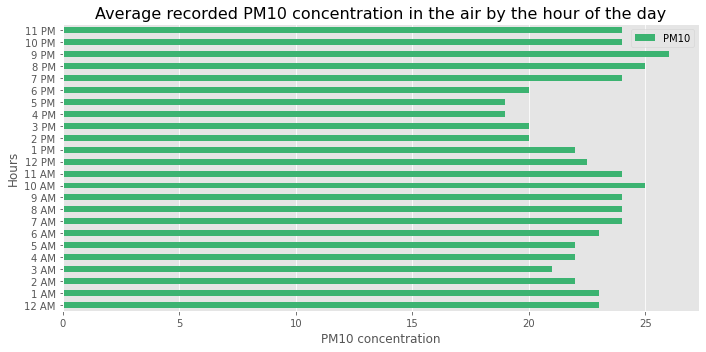

In [10]:
hours=['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM']
hours_matching={}
for i,j in enumerate(hours):
    hours_matching.setdefault(i,j)

hourly_avg=df[['hours','PM10']].groupby('hours').median().reset_index()
hourly_avg.hours=hourly_avg.hours.map(hours_matching)
hourly_avg=hourly_avg.set_index('hours')

with plt.style.context('ggplot'):
    hourly_avg.plot(figsize=(10,5),color='mediumseagreen',kind='barh',linewidth=1)
    plt.ylabel('Hours',fontsize=12)
    plt.xlabel('PM10 concentration',fontsize=12)
    plt.title('Average recorded PM10 concentration in the air by the hour of the day',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

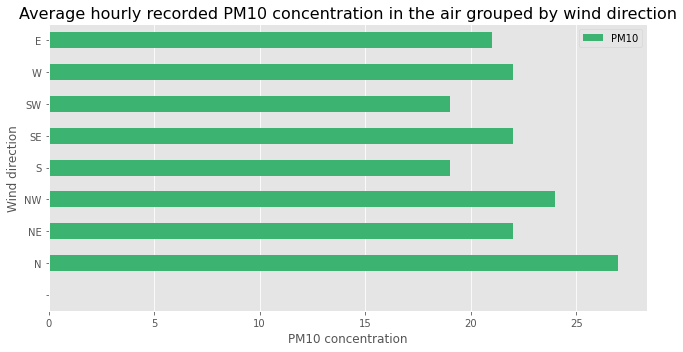

In [11]:
wind_data=df[['WindDirection','PM10']]
wind_data=wind_data.groupby('WindDirection').median()

with plt.style.context('ggplot'):
    wind_data.plot(figsize=(10,5),color='mediumseagreen',kind='barh',linewidth=1)
    plt.ylabel('Wind direction',fontsize=12)
    plt.xlabel('PM10 concentration',fontsize=12)
    plt.title('Average hourly recorded PM10 concentration in the air grouped by wind direction',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

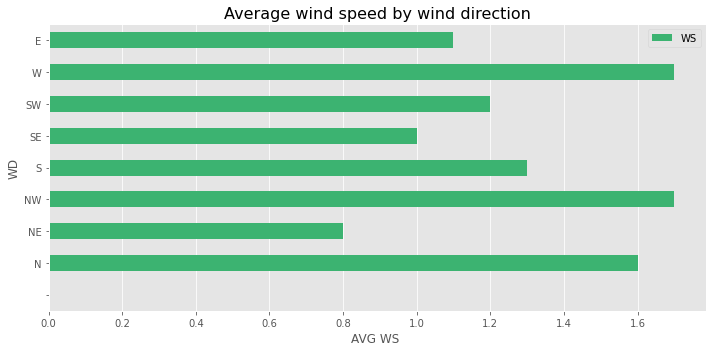

In [12]:
wind_speed=df[['WS','WindDirection']]
wind_speed=wind_speed.groupby('WindDirection').median()

with plt.style.context('ggplot'):
    wind_speed.plot(figsize=(10,5),color='mediumseagreen',kind='barh',linewidth=1)
    plt.ylabel('WD',fontsize=12)
    plt.xlabel('AVG WS ',fontsize=12)
    plt.title('Average wind speed by wind direction',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

##Taking care of missing data

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(exportdf.iloc[:,4:].values)
exportdf.iloc[:,4:] = imputer.transform(exportdf.iloc[:,4:].values)
print(exportdf)

     hours days months WindDirection   WS  PM10
0       01    1      4             N  1.3   9.0
1       02    1      4            SW  1.3   7.0
2       03    1      4            NW  1.6   7.0
3       04    1      4            NW  0.7   7.0
4       05    1      4             W  1.9   6.0
...    ...  ...    ...           ...  ...   ...
7747    20    2      9            SE  1.9  67.0
7748    21    2      9             W  0.7  52.0
7749    22    2      9             Ε  0.7  34.0
7750    23    2      9             W  1.0  34.0
7751    00    2      9             W  1.5  32.0

[7752 rows x 6 columns]


##Encoding categorical data

In [14]:
# indepedent variables(predictor variables) (1->N  2->NE  3->NW  4->S   5->SE  6->SW   7->W  8->E) TO 0 exei tis nan times
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
categorical_data = np.array(ct.fit_transform(exportdf))
print(categorical_data)
categorical_data=pd.DataFrame(categorical_data)                                 #isws xreiastei na dwsw column names
categorical_data=categorical_data.rename(columns={13:"PM10"})                   #den allazw ta columns names twn 9:"datetime",10:"WS" giati exw thema sto standardisation 
categorical_data = categorical_data.astype({0:'category',1:'category',2:'category',3:'category',4:'category',
                                            5:'category',6:'category',7:'category',8:'category',9:'category',10:'float64','PM10':'float64'}) #kanw float tis times tis sthlhs 10 poy einai to WIND SPEED
categorical_data=categorical_data.drop(0,axis=1)

[[0.0 1.0 0.0 ... '4' 1.3 9.0]
 [0.0 0.0 0.0 ... '4' 1.3 7.0]
 [0.0 0.0 0.0 ... '4' 1.6 7.0]
 ...
 [0.0 0.0 0.0 ... '9' 0.7 34.0]
 [0.0 0.0 0.0 ... '9' 1.0 34.0]
 [0.0 0.0 0.0 ... '9' 1.5 32.0]]


Import data in the data box for the utilization rate of the electricity generation units

In [15]:
#vazw sto DataFrame stoixeia gia ton syntelesti xrhsimopoihshs twn monadwn paragwghs energeias
categorical_data=categorical_data.astype({11:'float64'})
categorical_data.loc[(categorical_data[11]== 1, 'Jan')]= 65
categorical_data.loc[(categorical_data[11]== 2, 'Feb')]= 54.3
categorical_data.loc[(categorical_data[11]== 3, 'Mar')]= 58.3
categorical_data.loc[(categorical_data[11]== 4, 'Apr')]= 43.5
categorical_data.loc[(categorical_data[11]== 5, 'May')]= 51.4
categorical_data.loc[(categorical_data[11]== 6, 'Jun')]= 55.3
categorical_data.loc[(categorical_data[11]== 7, 'Jul')]= 79
categorical_data.loc[(categorical_data[11]== 8, 'Aug')]= 64.2
categorical_data.loc[(categorical_data[11]== 9, 'Sep')]= 64.6
categorical_data.loc[(categorical_data[11]== 10, 'Oct')]= 49.5
categorical_data.loc[(categorical_data[11]== 11, 'Nov')]= 58.3
categorical_data.loc[(categorical_data[11]== 12, 'Dec')]= 60.2
categorical_data["Syntelestis Xrhsimopoihshs"]=categorical_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)


In [16]:
#vazw sto DataFrame stoixeia gia tin mesh mhniaia thermokrasia 
categorical_data=categorical_data.astype({11:'float64'})
categorical_data.loc[(categorical_data[11]== 1, 'Jan')]= 2.9
categorical_data.loc[(categorical_data[11]== 2, 'Feb')]= 3.3
categorical_data.loc[(categorical_data[11]== 3, 'Mar')]= 5.8
categorical_data.loc[(categorical_data[11]== 4, 'Apr')]= 11.8
categorical_data.loc[(categorical_data[11]== 5, 'May')]= 18.5
categorical_data.loc[(categorical_data[11]== 6, 'Jun')]= 20.7
categorical_data.loc[(categorical_data[11]== 7, 'Jul')]= 26.8
categorical_data.loc[(categorical_data[11]== 8, 'Aug')]= 24.3
categorical_data.loc[(categorical_data[11]== 9, 'Sep')]= 21.5
categorical_data.loc[(categorical_data[11]== 10, 'Oct')]= 13.9
categorical_data.loc[(categorical_data[11]== 11, 'Nov')]= 11
categorical_data.loc[(categorical_data[11]== 12, 'Dec')]= 4.9
categorical_data["Tmean"]=categorical_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)


In [17]:
#vazw sto DataFrame stoixeia gia tin miniaia mesh timi tou Yetou 
categorical_data=categorical_data.astype({11:'float64'})
categorical_data.loc[(categorical_data[11]== 1, 'Jan')]= 41
categorical_data.loc[(categorical_data[11]== 2, 'Feb')]= 90
categorical_data.loc[(categorical_data[11]== 3, 'Mar')]= 94
categorical_data.loc[(categorical_data[11]== 4, 'Apr')]= 28
categorical_data.loc[(categorical_data[11]== 5, 'May')]= 69
categorical_data.loc[(categorical_data[11]== 6, 'Jun')]= 37
categorical_data.loc[(categorical_data[11]== 7, 'Jul')]= 33
categorical_data.loc[(categorical_data[11]== 8, 'Aug')]= 69
categorical_data.loc[(categorical_data[11]== 9, 'Sep')]= 112
categorical_data.loc[(categorical_data[11]== 10, 'Oct')]= 120
categorical_data.loc[(categorical_data[11]== 11, 'Nov')]= 35
categorical_data.loc[(categorical_data[11]== 12, 'Dec')]= 2
categorical_data["Yetos"]=categorical_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)


In [18]:
categorical_data=categorical_data[[1,2,3,4,5,6,7,8,9,10,11,12,'PM10','Syntelestis Xrhsimopoihshs','Tmean','Yetos']]
categorical_data=categorical_data.astype({9: 'float64'})
categorical_data=categorical_data.astype({'Syntelestis Xrhsimopoihshs':'float64'})
categorical_data=categorical_data.astype({12:'float64'})
categorical_data=categorical_data.astype({'Tmean' :'float64'})
categorical_data=categorical_data.astype({'Yetos' :'float64'})
categorical_data=categorical_data.rename(columns={9:'hours',10:'days',11:'months',12:'WS','Syntelestis Xrhsimopoihshs':'Synt Xrhs'})


In [19]:
print(categorical_data)

        1    2    3    4    5    6  ... months   WS  PM10  Synt Xrhs  Tmean  Yetos
0     1.0  0.0  0.0  0.0  0.0  0.0  ...    4.0  1.3   9.0       43.5   11.8   28.0
1     0.0  0.0  0.0  0.0  0.0  1.0  ...    4.0  1.3   7.0       43.5   11.8   28.0
2     0.0  0.0  1.0  0.0  0.0  0.0  ...    4.0  1.6   7.0       43.5   11.8   28.0
3     0.0  0.0  1.0  0.0  0.0  0.0  ...    4.0  0.7   7.0       43.5   11.8   28.0
4     0.0  0.0  0.0  0.0  0.0  0.0  ...    4.0  1.9   6.0       43.5   11.8   28.0
...   ...  ...  ...  ...  ...  ...  ...    ...  ...   ...        ...    ...    ...
7747  0.0  0.0  0.0  0.0  1.0  0.0  ...    9.0  1.9  67.0       64.6   21.5  112.0
7748  0.0  0.0  0.0  0.0  0.0  0.0  ...    9.0  0.7  52.0       64.6   21.5  112.0
7749  0.0  0.0  0.0  0.0  0.0  0.0  ...    9.0  0.7  34.0       64.6   21.5  112.0
7750  0.0  0.0  0.0  0.0  0.0  0.0  ...    9.0  1.0  34.0       64.6   21.5  112.0
7751  0.0  0.0  0.0  0.0  0.0  0.0  ...    9.0  1.5  32.0       64.6   21.5  112.0

[77

## Correlation matrix

In [ ]:
print('Correlation matrix\n',categorical_data.corr())
sns.set()
plt.figure(figsize=(13,9))
correlation_data = categorical_data[['hours', 'days', 'months', 'WS','PM10','Synt Xrhs', 'Tmean', 'Yetos']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

# Splitting the dataset into the Training set and Test set

In [56]:
X= categorical_data.drop('PM10',axis=1)                                        #indepedent variable
y=categorical_data['PM10']                                                     #depedent variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


In [22]:
print(X,"\n\n",y)

        1    2    3    4    5    6  ... days months   WS  Synt Xrhs  Tmean  Yetos
0     1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0    4.0  1.3       43.5   11.8   28.0
1     0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0    4.0  1.3       43.5   11.8   28.0
2     0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0    4.0  1.6       43.5   11.8   28.0
3     0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0    4.0  0.7       43.5   11.8   28.0
4     0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0    4.0  1.9       43.5   11.8   28.0
...   ...  ...  ...  ...  ...  ...  ...  ...    ...  ...        ...    ...    ...
7747  0.0  0.0  0.0  0.0  1.0  0.0  ...  2.0    9.0  1.9       64.6   21.5  112.0
7748  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0    9.0  0.7       64.6   21.5  112.0
7749  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0    9.0  0.7       64.6   21.5  112.0
7750  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0    9.0  1.0       64.6   21.5  112.0
7751  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0    9.0  1.5       64.6   21.5  112.0

[7752 rows x 15

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                                                           #standardisation
colNumber=8                                                                    
X_train.iloc[:, colNumber:] = sc.fit_transform(X_train.iloc[:, colNumber:].values)#Me tin fit_transform upologizw tin mesi timi kai tin tupiki apoklisi 
X_test.iloc[:, colNumber:] = sc.transform(X_test.iloc[:, colNumber:].values)

In [24]:
print(X_train)

        1    2    3    4  ...        WS Synt Xrhs     Tmean     Yetos
101   0.0  0.0  0.0  0.0  ... -0.606581 -1.628251 -0.139960 -0.798025
3943  1.0  0.0  0.0  0.0  ... -0.665520  2.299127  1.704191 -0.647552
3338  1.0  0.0  0.0  0.0  ...  0.218573  0.750302 -1.234156 -0.406795
7535  0.0  0.0  0.0  0.0  ...  0.041754 -0.964469  0.118221  1.970680
4226  0.0  0.0  1.0  0.0  ... -0.370823 -0.322813  0.954237 -0.527173
...   ...  ...  ...  ...  ...       ...       ...       ...       ...
905   0.0  1.0  0.0  0.0  ... -0.194004  0.661798  1.396833  0.435854
5192  0.0  0.0  1.0  0.0  ...  1.927819 -0.754271  0.683761  0.435854
3980  0.0  0.0  0.0  1.0  ...  0.395391  2.299127  1.704191 -0.647552
235   0.0  0.0  1.0  0.0  ... -0.429762 -1.628251 -0.139960 -0.798025
5157  0.0  0.0  1.0  0.0  ...  0.277512 -0.754271  0.683761  0.435854

[5814 rows x 15 columns]


In [25]:
print(X_test)

        1    2    3    4  ...        WS Synt Xrhs     Tmean     Yetos
6430  0.0  0.0  0.0  0.0  ... -0.488702  0.009078 -0.877620  1.188220
863   0.0  0.0  1.0  0.0  ...  0.277512  0.661798  1.396833  0.435854
7001  0.0  1.0  0.0  0.0  ... -0.665520  0.009078 -0.238314 -0.587363
5781  0.0  0.0  0.0  0.0  ... -0.783399  0.009078 -0.877620  1.188220
6977  0.0  0.0  0.0  1.0  ... -0.488702  0.009078 -0.238314 -0.587363
...   ...  ...  ...  ...  ...       ...       ...       ...       ...
6025  1.0  0.0  0.0  0.0  ... -0.311883  0.009078 -0.877620  1.188220
5862  0.0  0.0  1.0  0.0  ...  1.809940  0.009078 -0.877620  1.188220
1228  0.0  0.0  0.0  0.0  ... -0.665520  0.661798  1.396833  0.435854
5899  0.0  1.0  0.0  0.0  ... -0.606581  0.009078 -0.877620  1.188220
6077  0.0  0.0  1.0  0.0  ... -0.076125  0.009078 -0.877620  1.188220

[1938 rows x 15 columns]



# Model Training

##As regression problem

####Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train) #fit the model

print('------ Linear Regression -------')
print('Score on train data: {}'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}\n'.format(lin_model.score(X_test,y_test)))
from sklearn.metrics import r2_score,mean_squared_error
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

------Linear Regression -------
Score on train data: 0.14678630841975604
Score on test data: 0.09879976987266448

Mean Squared Error: 201.9421606312345
Overall model accuracy: 0.09879976987266448


####Decision tree  regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=5,max_features='auto',min_samples_split=3, min_samples_leaf=2)
decision_tree.fit(X_train,y_train)
print('\n----------- Decision Tree Regressor ------------')
print('Score on train data: {}'.format(decision_tree.score(X_train,y_train)))
print('Score on test data: {}\n'.format(decision_tree.score(X_test,y_test)))
tree_pred = decision_tree.predict(X_test)
tree_mse = mean_squared_error(y_test,tree_pred)
tree_accuracy = r2_score(y_test,tree_pred)
print('Root Mean Squared Error: {}'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))


----------- Decision Tree Regressor ------------
Score on train data: 0.2957634814941499
Score on test data: 0.25114272234944746

Root Mean Squared Error: 12.953954870168994
Overall model accuracy: 0.25114272234944746


####Grid search decision tree 

In [29]:
from sklearn.model_selection import GridSearchCV,train_test_split
print('\n----------- Decision tree GridSearch ------------')

params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()
tree_search = GridSearchCV(tree,param_grid=params,n_jobs=-1,cv=5)
tree_search.fit(X_train,y_train)   # fit the model

print('Score on train data: {}'.format(tree_search.score(X_train,y_train)))
print('Score on test data: {}'.format(tree_search.score(X_test,y_test)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(X_test)
tree_search_mse = mean_squared_error(y_test,tree_search_pred)
tree_search_accuracy = r2_score(y_test,tree_search_pred)

print('Root Mean Squared Error: {}'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))


----------- Decision tree GridSearch ------------
Score on train data: 0.4055855719318816
Score on test data: 0.27794931098683096
Best parameters found:


{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 4}

Root Mean Squared Error: 12.719987826778391
Overall model accuracy: 0.27794931098683096


####RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest_search = RandomForestRegressor(n_estimators=100,max_depth=7, max_features='auto',
                              min_samples_split=7,min_samples_leaf=3)
forest_search.fit(X_train,y_train)
print('\n----------- RandomForest ------------')
print('\nScore on train data: {}'.format(forest_search.score(X_train,y_train)))
print('Score on test data: {}'.format(forest_search.score(X_test,y_test)))

forest_search_pred = forest_search.predict(X_test)
forest_search_mse = mean_squared_error(y_test,forest_search_pred)
forest_search_accuracy = r2_score(y_test,forest_search_pred)

print('Root Mean Squared Error: {}'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))


----------- RandomForest ------------

Score on train data: 0.49777032394036375
Score on test data: 0.4095274345754347
Root Mean Squared Error: 11.5027773719384
Overall model accuracy: 0.4095274345754347


####MLP

In [33]:
from sklearn.neural_network import MLPRegressor
clfMLP = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)
clfMLP.fit(X_train, y_train)
print('\n----------- MLP ------------')
print('\nScore on train data: {}'.format(clfMLP.score(X_train,y_train)))
print('Score on test data: {}'.format(clfMLP.score(X_test,y_test)))
MLP_search_pred = forest_search.predict(X_test)
MLP_search_mse = mean_squared_error(y_test,forest_search_pred)
MLP_search_accuracy = r2_score(y_test,forest_search_pred)

print('Root Mean Squared Error: {}'.format(np.sqrt(MLP_search_mse)))
print('Overall model accuracy: {}'.format(MLP_search_accuracy))


----------- MLP ------------

Score on train data: 0.5817034764857607
Score on test data: 0.34290269807538487
Root Mean Squared Error: 11.5027773719384
Overall model accuracy: 0.4095274345754347


####Gradient Boosting Regressor

In [36]:
from sklearn.ensemble import  GradientBoostingRegressor
grad_boost = GradientBoostingRegressor(n_estimators=100,max_depth=7,max_features='auto',
                                      min_samples_split=7,min_samples_leaf=3,learning_rate=0.1)
grad_boost.fit(X_train,y_train)
print('\n----------- Gradient Boosting Regressor ------------')
print('\nScore on train data: {}'.format(grad_boost.score(X_train,y_train)))
print('Score on test data: {}'.format(grad_boost.score(X_test,y_test)))

gboost_pred = grad_boost.predict(X_test)
gboost_mse = mean_squared_error(y_test,gboost_pred)
gboost_accuracy = r2_score(y_test,gboost_pred)

print('Root Mean Squared Error: {}'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))


----------- Gradient Boosting Regressor ------------

Score on train data: 0.8371741637764841
Score on test data: 0.507040551685294
Root Mean Squared Error: 10.510138758763643
Overall model accuracy: 0.507040551685294


####RandomizedSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV

params['learning_rate'] = np.linspace(0.1,0.2,10)#start,stop, num
# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
print('\n----------- Randomized Search ------------')
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(X_train,y_train)

print('\nScore on train data: {}'.format(gboost_search.score(X_train,y_train)))
print('Score on test data: {}'.format(gboost_search.score(X_test,y_test)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(X_test)
gboost_search_mse = mean_squared_error(y_test,gboost_search_pred)
gboost_search_accuracy = r2_score(y_test,gboost_search_pred)

print('Root Mean Squared Error: {}'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))


----------- Randomized Search ------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.8s finished



Score on train data: 0.7919989907140993
Score on test data: 0.4984723525981421
Best parameters found:


{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5}

Root Mean Squared Error: 10.60108439326726
Overall model accuracy: 0.49847235259814204


In [41]:
predicted=gboost_search.predict(X)

#Visualising the results

In [43]:
#xrisimopoiw to kalutero modelo gia na kanw predict ton deikti pm10
compare_data = pd.DataFrame({'dates':df['datetime'],
                            'Actual PM10':y,
                            'Predicted PM10':gboost_search.predict(X)})
compare_data["Actual PM10"] = pd.to_numeric(compare_data["Actual PM10"])
compare_data["Predicted PM10"] = pd.to_numeric(compare_data["Predicted PM10"])
compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM10'] = np.round(compare_data['Predicted PM10'],1)

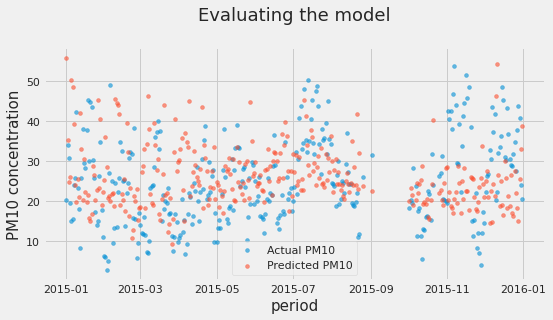

In [45]:
# plot the daily averages of the Actual PM10 and the predicted PM10
compare_data = compare_data.resample('D').mean()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,4))
    plt.scatter(compare_data.index,compare_data['Actual PM10'],s=15,label='Actual PM10',
               alpha=.6)
    plt.scatter(compare_data.index,compare_data['Predicted PM10'],s=15,label='Predicted PM10',
               alpha=.6)
    plt.legend()
    plt.title('Evaluating the model\n',
             fontsize=18)
    plt.xlabel('period',fontsize=15)
    plt.ylabel('PM10 concentration',fontsize=15)
    plt.show()  

Parity Plot

Text(0, 0.5, 'Predicted')

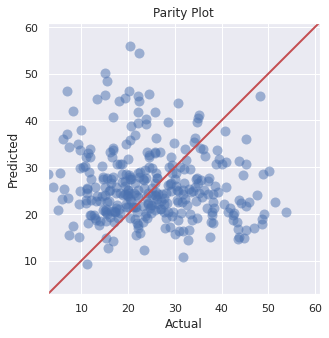

In [47]:
# Plot Figures me compare 
fignow = plt.figure(figsize=(5,5))

x = compare_data['Actual PM10']
y = compare_data["Predicted PM10"]

## find the boundaries of X and Y values
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))
# Reset the limits
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
# Ensure the aspect ratio is square
ax.set_aspect("equal", adjustable="box")
plt.plot(x,y,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)

ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)
# Calculate Statistics of the Parity Plot 
mean_abs_err = np.mean(np.abs(x-y))
rmse = np.sqrt(np.mean((x-y)**2))
rmse_std = rmse / np.std(y)
#z = np.polyfit(x,y, 1)
#y_hat = np.poly1d(z)(x)
# Title and labels 
plt.title("Parity Plot")
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Results and conclusions

In [55]:
print("\nREGRESSION \n avg",np.median(prediction),"\n standard deviation ",np.std(prediction) ,"\n")
print("DECISION TREE \n avg",np.median(tree_pred),"\n standard deviation ",np.std(tree_pred) ,"\n")
print("RANDOM FOREST \n avg",np.median(forest_search_pred),"\n standard deviation ",np.std(forest_search_pred),"\n")
print("GRADIENT BOOSTING REGRESSOR \n avg",np.median(gboost_pred),"\n standard deviation ",np.std(gboost_pred),"\n")
print("RANDOMIZED SEARCH \n avg",np.median(gboost_search_pred),"\n standard deviation ",np.std(gboost_search_pred),"\n")
print("test y \n avg",y_test.median(),"\n standard deviation",y_test.std(),"\n")


REGRESSION 
 avg 24.64894402377896 
 standard deviation  6.498272124889501 

DECISION TREE 
 avg 24.03515183154963 
 standard deviation  9.190139272569557 

RANDOM FOREST 
 avg 23.287844618958708 
 standard deviation  9.525059892324059 

GRADIENT BOOSTING REGRESSOR 
 avg 23.164792185769386 
 standard deviation  11.745780322394308 

RANDOMIZED SEARCH 
 avg 23.06590595122744 
 standard deviation  11.691204342261573 

test y 
 avg 22.0 
 standard deviation 14.973210437195938 





*  The results of predict percentages are very low 
*  Νotice that the results of the models are not satisfactory
*  Ι will treat the problem as a classification problem since I first do the output data as categorical data

